In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# Reload dataset from scratch
df = pd.read_csv("/kaggle/input/world-population-statistics-2023/world_population_data.csv")

# Clean column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

df.head()


,rank,cca3,country,continent,2023_population,2022_population,2020_population,2015_population,2010_population,2000_population,1990_population,1980_population,1970_population,area_(km²),density_(km²),growth_rate,world_percentage
0,1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.0,481,0.81%,17.85%
1,2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.0,151,-0.02%,17.81%
2,3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.0,37,0.50%,4.25%
3,4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.0,148,0.74%,3.47%
4,5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.0,312,1.98%,3.00%


In [73]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head()

,rank,cca3,country,continent,2023_population,2022_population,2020_population,2015_population,2010_population,2000_population,1990_population,1980_population,1970_population,area_(km²),density_(km²),growth_rate,world_percentage
0,1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.0,481,0.81%,17.85%
1,2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.0,151,-0.02%,17.81%
2,3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.0,37,0.50%,4.25%
3,4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.0,148,0.74%,3.47%
4,5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.0,312,1.98%,3.00%


In [74]:
df = pd.read_csv("/kaggle/input/world-population-statistics-2023/world_population_data.csv")
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head()


,rank,cca3,country,continent,2023_population,2022_population,2020_population,2015_population,2010_population,2000_population,1990_population,1980_population,1970_population,area_(km²),density_(km²),growth_rate,world_percentage
0,1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.0,481,0.81%,17.85%
1,2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.0,151,-0.02%,17.81%
2,3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.0,37,0.50%,4.25%
3,4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.0,148,0.74%,3.47%
4,5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.0,312,1.98%,3.00%


In [75]:
continent_pop = df.groupby("continent")["2023_population"].sum()
continent_pop

continent_percentage = (continent_pop / continent_pop.sum()) * 100
continent_percentage

continent
Africa           18.156965
Asia             59.075669
Europe            9.223081
North America     7.510993
Oceania           0.566608
South America     5.466684
Name: 2023_population, dtype: float64

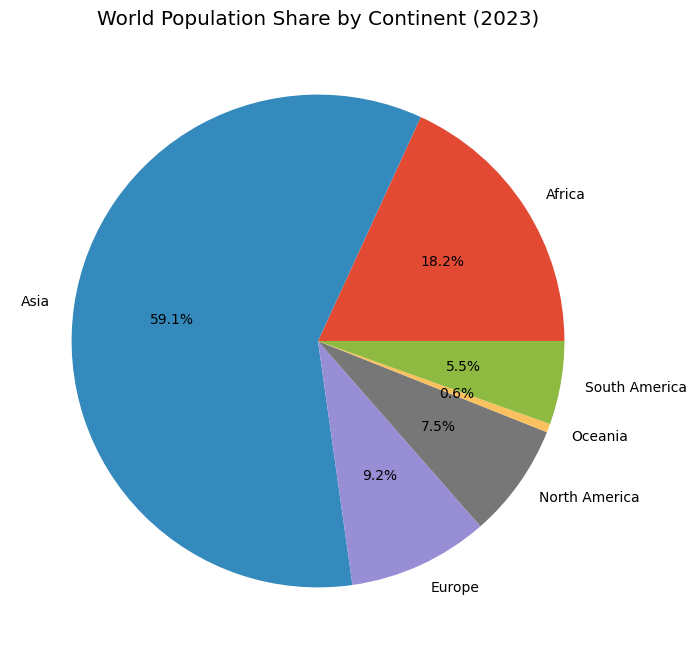

In [76]:
plt.figure(figsize=(8, 8))
plt.pie(
    continent_percentage,
    labels=continent_percentage.index,
    autopct="%1.1f%%"
)
plt.title("World Population Share by Continent (2023)")
plt.show()


In [77]:
# 1. Remove % signs, plus signs and spaces, keep only the numeric part
df["growth_rate"] = (
    df["growth_rate"]
    .astype(str)          # make sure it's string
    .str.replace("%", "", regex=False)
    .str.replace("+", "", regex=False)
    .str.strip()
)

# 2. Convert to numeric
df["growth_rate"] = pd.to_numeric(df["growth_rate"], errors="coerce")

df["growth_rate"].head(10)

continent_growth = df.groupby("continent")["growth_rate"].mean()
continent_growth

continent
Africa           2.126491
Asia             0.948000
Europe           0.179000
North America    0.455750
Oceania          0.859565
South America    0.877143
Name: growth_rate, dtype: float64

In [78]:
# Make sure continent_pop and continent_growth already exist
# (if not, recompute them first)

# continent_pop = df.groupby("continent")["2023_population"].sum()
# continent_growth = df.groupby("continent")["growth_rate"].mean()

proj = pd.DataFrame({
    "continent": continent_pop.index,
    "population_2023": continent_pop.values,
    "growth_rate_percent": continent_growth.values
})

proj["growth_rate"] = proj["growth_rate_percent"] / 100
proj.head()


,continent,population_2023,growth_rate_percent,growth_rate
0,Africa,1460476458,2.126491,0.021265
1,Asia,4751819588,0.948000,0.009480
2,Europe,741869197,0.179000,0.001790
3,North America,604155369,0.455750,0.004557
4,Oceania,45575769,0.859565,0.008596


In [79]:
# Long-term projections
years_2050 = 2050 - 2023   # 27 years
years_2100 = 2100 - 2023   # 77 years

proj["population_2050"] = proj["population_2023"] * (1 + proj["growth_rate"]) ** years_2050
proj["population_2100"] = proj["population_2023"] * (1 + proj["growth_rate"]) ** years_2100

proj[["continent", "population_2023", "population_2050", "population_2100"]]


,continent,population_2023,population_2050,population_2100
0,Africa,1460476458,2.577696e+09,7.381629e+09
1,Asia,4751819588,6.130535e+09,9.826171e+09
2,Europe,741869197,7.785707e+08,8.513980e+08
3,North America,604155369,6.830748e+08,8.574489e+08
4,Oceania,45575769,5.742427e+07,8.809476e+07
5,South America,439719009,5.566473e+08,8.614276e+08


In [80]:
proj_simple["change_2023_2050"] = proj_simple["2050"] - proj_simple["2023"]
proj_simple["change_2050_2100"] = proj_simple["2100"] - proj_simple["2050"]
proj_simple["change_2023_2100"] = proj_simple["2100"] - proj_simple["2023"]

proj_simple


,continent,2023,2050,2100,change_2023_2050,change_2050_2100,change_2023_2100
0,Africa,1460476458,2.577696e+09,7.381629e+09,1.117219e+09,4.803933e+09,5.921153e+09
1,Asia,4751819588,6.130535e+09,9.826171e+09,1.378715e+09,3.695636e+09,5.074351e+09
2,Europe,741869197,7.785707e+08,8.513980e+08,3.670145e+07,7.282737e+07,1.095288e+08
3,North America,604155369,6.830748e+08,8.574489e+08,7.891941e+07,1.743742e+08,2.532936e+08
4,Oceania,45575769,5.742427e+07,8.809476e+07,1.184850e+07,3.067049e+07,4.251899e+07
5,South America,439719009,5.566473e+08,8.614276e+08,1.169283e+08,3.047803e+08,4.217086e+08


In [81]:
total_2023 = proj_simple["2023"].sum()
total_2050 = proj_simple["2050"].sum()
total_2100 = proj_simple["2100"].sum()

share_simple = pd.DataFrame({
    "continent": proj_simple["continent"],
    "share_2023_%": proj_simple["2023"] / total_2023 * 100,
    "share_2050_%": proj_simple["2050"] / total_2050 * 100,
    "share_2100_%": proj_simple["2100"] / total_2100 * 100
})

share_simple


,continent,share_2023_%,share_2050_%,share_2100_%
0,Africa,18.156965,23.903082,37.156781
1,Asia,59.075669,56.848707,49.461830
2,Europe,9.223081,7.219718,4.285668
3,North America,7.510993,6.334181,4.316126
4,Oceania,0.566608,0.532498,0.443441
5,South America,5.466684,5.161814,4.336154


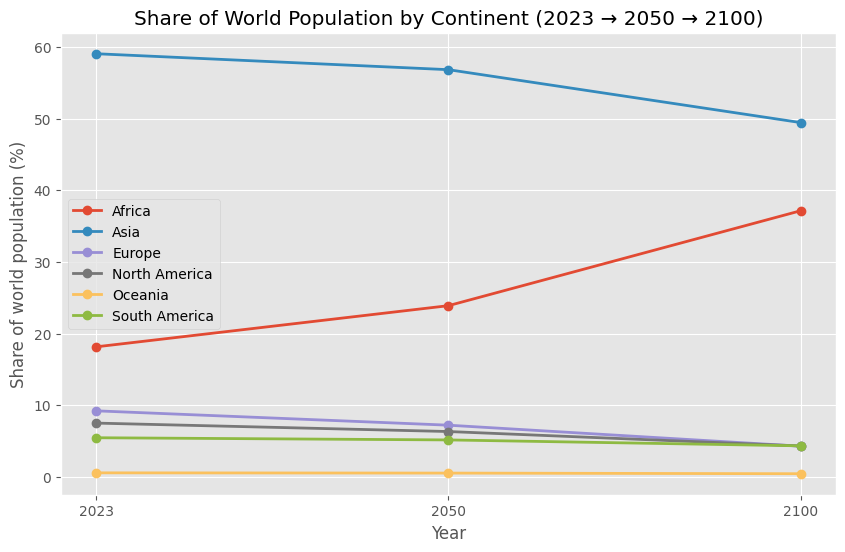

In [82]:
plt.figure(figsize=(10, 6))

years = ["2023", "2050", "2100"]

for i, row in share_simple.iterrows():
    plt.plot(
        years,
        [row["share_2023_%"], row["share_2050_%"], row["share_2100_%"]],
        marker="o",
        linewidth=2,
        label=row["continent"]
    )

plt.title("Share of World Population by Continent (2023 → 2050 → 2100)")
plt.ylabel("Share of world population (%)")
plt.xlabel("Year")
plt.grid(True)
plt.legend()
plt.show()


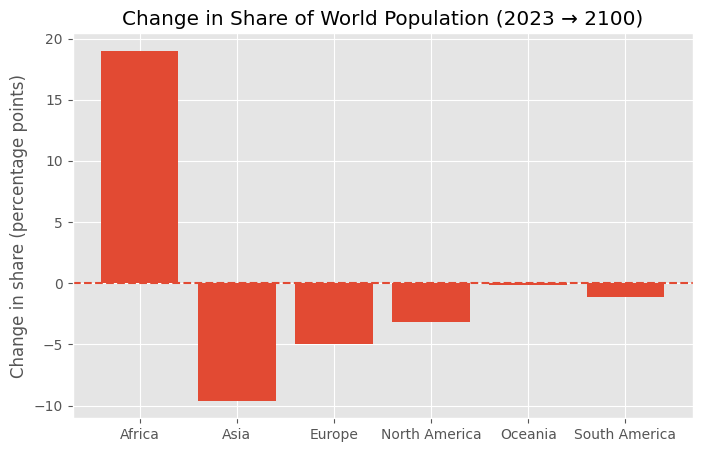

In [83]:
share_simple["change_share_2023_2100"] = (
    share_simple["share_2100_%"] - share_simple["share_2023_%"]
)

plt.figure(figsize=(8, 5))
plt.bar(share_simple["continent"], share_simple["change_share_2023_2100"])
plt.axhline(0, linestyle="--")
plt.title("Change in Share of World Population (2023 → 2100)")
plt.ylabel("Change in share (percentage points)")
plt.grid(True, axis="y")
plt.show()
